<a href="https://colab.research.google.com/github/manolo28050/ForstarBackup/blob/main/RedNeuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
##--------------------------------------
#       IMPORTACIÓN DE LIBRERÍAS
#--------------------------------------
from numpy import exp, array, random
import matplotlib.pyplot as plt
#    OBSERVACIONES Y PREDICCIONES
#--------------------------------------
# X1 = característica que representa presencia de rasgos humanos (ojos, nariz, simetría)
# X2 = característica que representa ausencia de rasgos humanos (formas aleatorias, no simétricas)

observaciones_entradas = array([
    [0.9, 0.1],   # Rostro humano
    [0.85, 0.15], # Probablemente rostro
    [0.3, 0.7],   # No rostro
    [0.2, 0.8],   # No rostro
    [0.95, 0.05], # Rostro humano claro
    [0.4, 0.6]    # No rostro
])

# 1 = rostro humano, 0 = no rostro
predicciones = array([[1], [1], [0], [0], [1], [0]])



In [34]:
#--------------------------------------
#      PARAMETRIZACIÓN DEL PERCEPTRÓN
#--------------------------------------
# Generación de los pesos en el intervalo [-1, 1]

random.seed(1)
limiteMin = -1
limiteMax = 1

w11 = (limiteMax - limiteMin) * random.random() + limiteMin
w21 = (limiteMax - limiteMin) * random.random() + limiteMin
w31 = (limiteMax - limiteMin) * random.random() + limiteMin

# El sesgo
sesgo = 1
wb = 0

# Almacenamiento de los pesos iniciales
peso = [w11, w21, w31, wb]

# Tasa de aprendizaje
txAprendizaje = 0.1

# Cantidad de épocas
epochs = 300


In [35]:
#--------------------------------------
#       FUNCIONES ÚTILES
#--------------------------------------

def suma_ponderada(X1, W11, X2, W21, B, WB):
    return (B*WB + (X1*W11 + X2*W21))

def funcion_activacion_sigmoide(valor_suma_ponderada):
    return (1 / (1 + exp(-valor_suma_ponderada)))

def funcion_activacion_relu(valor_suma_ponderada):
    return (max(0, valor_suma_ponderada))

def error_lineal(valor_esperado, valor_predicho):
    return (valor_esperado - valor_predicho)

def calculo_gradiente(valor_entrada, prediccion, error):
    return (-1 * error * prediccion * (1 - prediccion) * valor_entrada)

def calculo_valor_ajuste(valor_gradiente, tasa_aprendizaje):
    return (valor_gradiente * tasa_aprendizaje)

def calculo_nuevo_peso(valor_peso, valor_ajuste):
    return (valor_peso - valor_ajuste)

def calculo_MSE(predicciones_realizadas, predicciones_esperadas):
    i = 0
    suma = 0
    for prediccion in predicciones_esperadas:
        diferencia = predicciones_esperadas[i] - predicciones_realizadas[i]
        cuadradoDiferencia = diferencia * diferencia
        suma = suma + cuadradoDiferencia
        i = i + 1
    media_cuadratica = 1 / (len(predicciones_esperadas)) * suma
    return media_cuadratica


In [36]:
#--------------------------------------
#       GRÁFICA
#--------------------------------------
Grafica_MSE = []


EPOCH (0/300)
MSE: [0.29892238]
EPOCH (1/300)
MSE: [0.29501479]
EPOCH (2/300)
MSE: [0.29114981]
EPOCH (3/300)
MSE: [0.28732789]
EPOCH (4/300)
MSE: [0.28354946]
EPOCH (5/300)
MSE: [0.27981488]
EPOCH (6/300)
MSE: [0.27612451]
EPOCH (7/300)
MSE: [0.27247866]
EPOCH (8/300)
MSE: [0.2688776]
EPOCH (9/300)
MSE: [0.26532159]
EPOCH (10/300)
MSE: [0.26181083]
EPOCH (11/300)
MSE: [0.25834551]
EPOCH (12/300)
MSE: [0.25492575]
EPOCH (13/300)
MSE: [0.25155168]
EPOCH (14/300)
MSE: [0.24822335]
EPOCH (15/300)
MSE: [0.24494081]
EPOCH (16/300)
MSE: [0.24170405]
EPOCH (17/300)
MSE: [0.23851305]
EPOCH (18/300)
MSE: [0.23536773]
EPOCH (19/300)
MSE: [0.23226799]
EPOCH (20/300)
MSE: [0.2292137]
EPOCH (21/300)
MSE: [0.22620469]
EPOCH (22/300)
MSE: [0.22324076]
EPOCH (23/300)
MSE: [0.22032169]
EPOCH (24/300)
MSE: [0.21744722]
EPOCH (25/300)
MSE: [0.21461705]
EPOCH (26/300)
MSE: [0.2118309]
EPOCH (27/300)
MSE: [0.2090884]
EPOCH (28/300)
MSE: [0.20638922]
EPOCH (29/300)
MSE: [0.20373297]
EPOCH (30/300)
MSE: [0.2

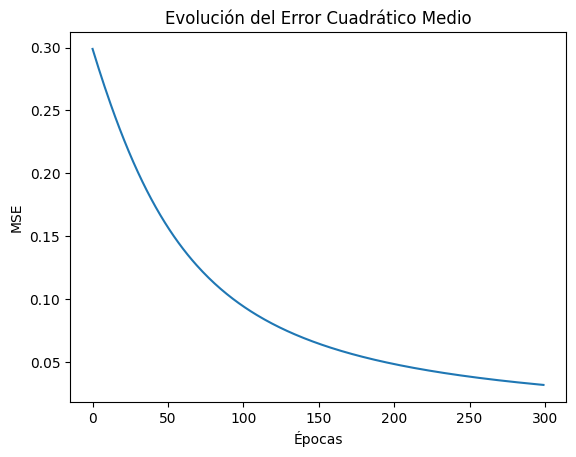


¡Aprendizaje terminado!
Pesos iniciales: 
W11 = -0.165955990594852
W21 = 0.4406489868843162
Wb  = 0

Pesos finales: 
W11 = 2.600166884900719
W21 = -2.78657251487643
Wb  = -0.4610986262651747

--------------------------
PREDICCIÓN FINAL
--------------------------
Predicción del [0.9, 0.1] -> ✅ Es un rostro humano
Valor numérico de predicción: 0.8321


In [37]:
#--------------------------------------
#       GRÁFICA
#--------------------------------------

Grafica_MSE=[]

#--------------------------------------
#        APRENDIZAJE
#--------------------------------------

for epoch in range(0,epochs):
    print("EPOCH ("+str(epoch)+"/"+str(epochs)+")")
    predicciones_realizadas_durante_epoch = []
    predicciones_esperadas = []
    numObservacion = 0

    for observacion in observaciones_entradas:

        #Carga de la capa de entrada
        x1 = observacion[0]
        x2 = observacion[1]

        #Valor de predicción esperado
        valor_esperado = predicciones[numObservacion][0]

        #Etapa 1: Cálculo de la suma ponderada
        valor_suma_ponderada = suma_ponderada(x1, w11, x2, w21, sesgo, wb)

        #Etapa 2: Aplicación de la función de activación
        valor_predicho = funcion_activacion_sigmoide(valor_suma_ponderada)

        #Etapa 3: Cálculo del error
        valor_error = error_lineal(valor_esperado, valor_predicho)

        # Actualización de pesos
        gradiente_W11 = calculo_gradiente(x1, valor_predicho, valor_error)
        valor_ajuste_W11 = calculo_valor_ajuste(gradiente_W11, txAprendizaje)
        w11 = calculo_nuevo_peso(w11, valor_ajuste_W11)

        gradiente_W21 = calculo_gradiente(x2, valor_predicho, valor_error)
        valor_ajuste_W21 = calculo_valor_ajuste(gradiente_W21, txAprendizaje)
        w21 = calculo_nuevo_peso(w21, valor_ajuste_W21)

        gradiente_Wb = calculo_gradiente(sesgo, valor_predicho, valor_error)
        valor_ajuste_Wb = calculo_valor_ajuste(gradiente_Wb, txAprendizaje)
        wb = calculo_nuevo_peso(wb, valor_ajuste_Wb)

        # Guardar resultados
        predicciones_realizadas_durante_epoch.append(valor_predicho)
        predicciones_esperadas.append(valor_esperado)
        numObservacion += 1

    MSE = calculo_MSE(predicciones_realizadas_durante_epoch, predicciones)
    Grafica_MSE.append(MSE)
    print("MSE:", MSE)

#--------------------------------------
#       GRÁFICA DEL MSE
#--------------------------------------
plt.plot(Grafica_MSE)
plt.ylabel('MSE')
plt.xlabel('Épocas')
plt.title('Evolución del Error Cuadrático Medio')
plt.show()


#--------------------------------------
#       RESULTADOS FINALES
#--------------------------------------
print("\n¡Aprendizaje terminado!")
print("Pesos iniciales: ")
print("W11 =", str(peso[0]))
print("W21 =", str(peso[1]))
print("Wb  =", str(peso[3]))

print("\nPesos finales: ")
print("W11 =", str(w11))
print("W21 =", str(w21))
print("Wb  =", str(wb))


#--------------------------------------
#       PREDICCIÓN FINAL
#--------------------------------------
print("\n--------------------------")
print("PREDICCIÓN FINAL")
print("--------------------------")

# Entradas de prueba (puedes cambiarlas)
x1 = 0.9  # Ejemplo: rasgos humanos (forma facial simétrica)
x2 = 0.1  # Ejemplo: baja irregularidad (probable rostro humano)

#Etapa 1: Cálculo de la suma ponderada
valor_suma_ponderada = suma_ponderada(x1, w11, x2, w21, sesgo, wb)

#Etapa 2: Aplicación de la función de activación
valor_predicho = funcion_activacion_sigmoide(valor_suma_ponderada)

# Interpretación del resultado
if valor_predicho >= 0.5:
    resultado = "✅ Es un rostro humano"
else:
    resultado = "❌ No es un rostro humano"

print(f"Predicción del [{x1}, {x2}] -> {resultado}")
print("Valor numérico de predicción:", round(valor_predicho, 4))

